In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("natesutton/njpretermbirths")

print("Path to dataset files:", path)

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Hi\.cache\kagglehub\datasets\natesutton\njpretermbirths\versions\1


In [3]:
import os
import pandas as pd

# List all files in the downloaded directory
files = os.listdir(path)
print("Files in dataset folder:", files)

# Find the CSV file (assuming there's only one CSV file)
csv_file = [file for file in files if file.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)

# Load the dataset
df = pd.read_csv(csv_path)

# Display dataset information
print("Dataset loaded successfully!")
print(df.info())  # Show column details
print(df.head())  # Show first few rows


Files in dataset folder: ['births.csv']


C:\Users\Hi\AppData\Local\Temp\ipykernel_10736\2152927372.py:13: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096936 entries, 0 to 3096935
Data columns (total 6 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   age_group                     object
 1   reported_race_ethnicity       object
 2   previous_births               object
 3   tobacco_use_during_pregnancy  object
 4   adequate_prenatal_care        object
 5   preterm_indicator             int64 
dtypes: int64(1), object(5)
memory usage: 141.8+ MB
None
      age_group reported_race_ethnicity previous_births  \
0  Under 15 yrs     White, non-Hispanic             NaN   
1  Under 15 yrs     White, non-Hispanic             NaN   
2  Under 15 yrs     White, non-Hispanic             NaN   
3  Under 15 yrs     White, non-Hispanic             NaN   
4  Under 15 yrs     White, non-Hispanic             NaN   

  tobacco_use_during_pregnancy adequate_prenatal_care  preterm_indicator  
0                          Yes      

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 age_group                             0
reported_race_ethnicity               0
previous_births                 1266413
tobacco_use_during_pregnancy          0
adequate_prenatal_care                0
preterm_indicator                     0
dtype: int64


In [5]:
df['previous_births'].fillna(0, inplace=True)

# Verify if missing values are handled
print("Missing values after filling:\n", df.isnull().sum())


C:\Users\Hi\AppData\Local\Temp\ipykernel_10736\4027383198.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_births'].fillna(0, inplace=True)


Missing values after filling:
 age_group                       0
reported_race_ethnicity         0
previous_births                 0
tobacco_use_during_pregnancy    0
adequate_prenatal_care          0
preterm_indicator               0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ['age_group', 'reported_race_ethnicity', 'tobacco_use_during_pregnancy', 'adequate_prenatal_care']

# Dictionary to store encoders
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for reference

# Check encoded data
print("Categorical Encoding Complete. Sample Data:")
print(df.head())


Categorical Encoding Complete. Sample Data:
   age_group  reported_race_ethnicity previous_births  \
0          9                        3               0   
1          9                        3               0   
2          9                        3               0   
3          9                        3               0   
4          9                        3               0   

   tobacco_use_during_pregnancy  adequate_prenatal_care  preterm_indicator  
0                             1                       1                  0  
1                             1                       1                  0  
2                             1                       1                  0  
3                             1                       1                  0  
4                             1                       1                  0  


In [7]:
dict(zip(label_encoders['age_group'].classes_, label_encoders['age_group'].transform(label_encoders['age_group'].classes_)))


{'15 to 17 yrs': np.int64(0),
 '18 to 19 yrs': np.int64(1),
 '20 to 24 yrs': np.int64(2),
 '25 to 29 yrs': np.int64(3),
 '30 to 34 yrs': np.int64(4),
 '35 to 39 yrs': np.int64(5),
 '40 to 44 yrs': np.int64(6),
 '45 to 49 yrs': np.int64(7),
 '50+ yrs': np.int64(8),
 'Under 15 yrs': np.int64(9)}

In [8]:
dict(zip(label_encoders['reported_race_ethnicity'].classes_, label_encoders['reported_race_ethnicity'].transform(label_encoders['reported_race_ethnicity'].classes_)))


{'Asian, non-Hispanic': np.int64(0),
 'Black, non-Hispanic': np.int64(1),
 'Hispanic (of any race)': np.int64(2),
 'White, non-Hispanic': np.int64(3)}

In [9]:
dict(zip(label_encoders['adequate_prenatal_care'].classes_, label_encoders['adequate_prenatal_care'].transform(label_encoders['adequate_prenatal_care'].classes_)))


{'Adequate': np.int64(0), 'Inadequate': np.int64(1)}

In [10]:
print(df.dtypes)


age_group                        int64
reported_race_ethnicity          int64
previous_births                 object
tobacco_use_during_pregnancy     int64
adequate_prenatal_care           int64
preterm_indicator                int64
dtype: object


In [11]:
df['previous_births'] = pd.to_numeric(df['previous_births'], errors='coerce')


In [12]:
print(df.dtypes)  # Ensure "previous_births" is now float or int


age_group                         int64
reported_race_ethnicity           int64
previous_births                 float64
tobacco_use_during_pregnancy      int64
adequate_prenatal_care            int64
preterm_indicator                 int64
dtype: object


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['previous_births'] = scaler.fit_transform(df[['previous_births']])

print("Numerical feature scaled successfully!")


Numerical feature scaled successfully!


In [14]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['preterm_indicator'])  # All columns except the target
y = df['preterm_indicator']  # Target variable

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")


Training Set: (2477548, 5), (2477548,)
Testing Set: (619388, 5), (619388,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9075


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define MLP model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_history = mlp_model.fit(X_train, y_train, epochs=6, batch_size=76, validation_data=(X_test, y_test))

# Evaluate on test set
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print(f"MLP Accuracy: {mlp_accuracy:.4f}")


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
32600/32600 ━━━━━━━━━━━━━━━━━━━━ 101s 3ms/step - accuracy: 0.9077 - loss: 0.3185 - val_accuracy: 0.9076 - val_loss: 0.3081
Epoch 2/6
32600/32600 ━━━━━━━━━━━━━━━━━━━━ 99s 3ms/step - accuracy: 0.9077 - loss: 0.3079 - val_accuracy: 0.9076 - val_loss: 0.3082
Epoch 3/6
32600/32600 ━━━━━━━━━━━━━━━━━━━━ 102s 3ms/step - accuracy: 0.9083 - loss: 0.3066 - val_accuracy: 0.9076 - val_loss: 0.3082
Epoch 4/6
32600/32600 ━━━━━━━━━━━━━━━━━━━━ 100s 3ms/step - accuracy: 0.9078 - loss: 0.3077 - val_accuracy: 0.9076 - val_loss: 0.3082
Epoch 5/6
32600/32600 ━━━━━━━━━━━━━━━━━━━━ 103s 3ms/step - accuracy: 0.9078 - loss: 0.3076 - val_accuracy: 0.9076 - val_loss: 0.3082
Epoch 6/6
32600/32600 ━━━━━━━━━━━━━━━━━━━━ 102s 3ms/step - accuracy: 0.9077 - loss: 0.3078 - val_accuracy: 0.9076 - val_loss: 0.3084
19356/19356 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9075 - loss: 0.3086
MLP Accuracy: 0.9076


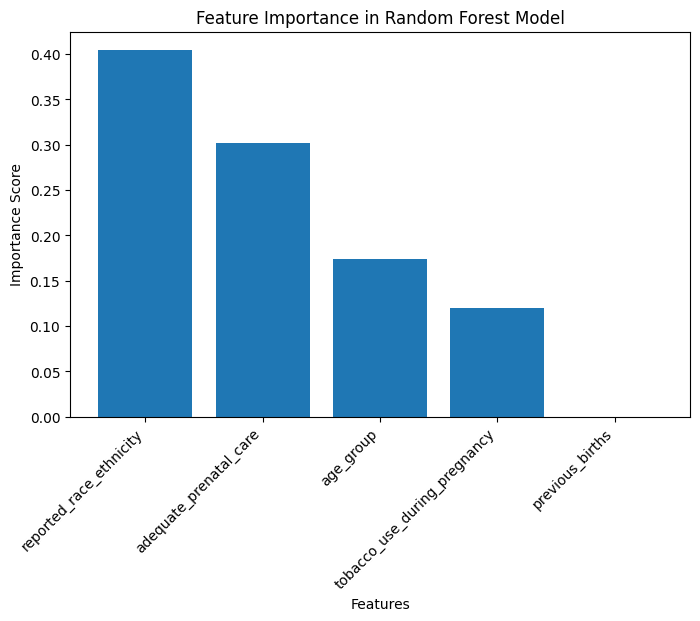

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest Model")
plt.show()


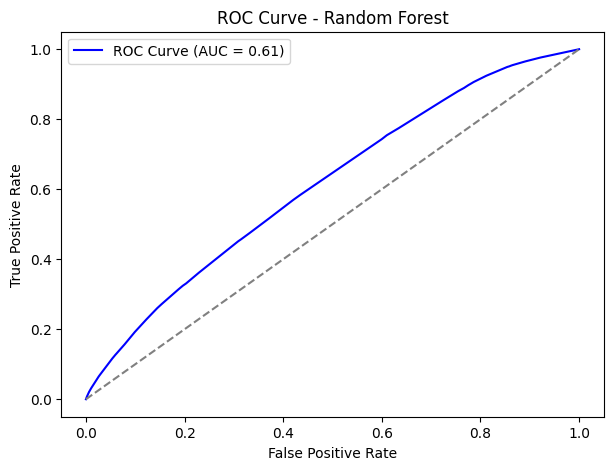

In [18]:
from sklearn.metrics import roc_curve, auc

# Get probability scores
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


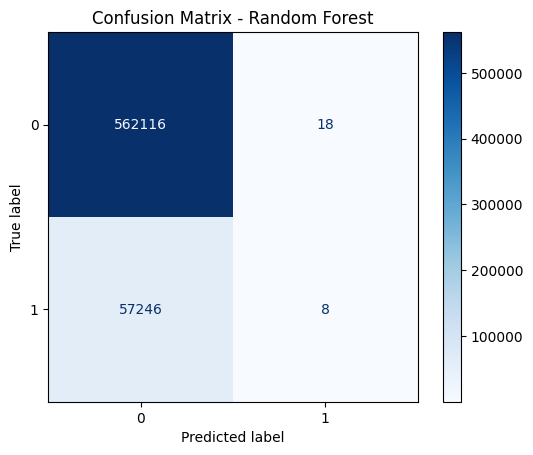

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [20]:
from sklearn.metrics import classification_report, accuracy_score

# Get predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)
y_pred_mlp = (y_pred_mlp > 0.5).astype(int)  # Convert probabilities to binary (if using sigmoid activation)

# Print evaluation metrics
print("MLP Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp, digits=4))


19356/19356 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step
MLP Model Performance:
Accuracy: 0.9075635950325159


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0     0.9076    1.0000    0.9515    562134
           1     0.0000    0.0000    0.0000     57254

    accuracy                         0.9076    619388
   macro avg     0.4538    0.5000    0.4758    619388
weighted avg     0.8237    0.9076    0.8636    619388



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
import pickle
with open("mlp_model.pkl", "wb") as file:
    pickle.dump(mlp_model, file)

print("Model saved successfully!")

Model saved successfully!


In [39]:
import numpy as np

# Example user input (adjust values as needed)
user_input = np.array([[4.0, 1.0, 1.0, 1.0]], dtype=np.float32)  # Shape (1, 4)
print(user_input.shape)  # Should print (1, 4)

(1, 4)


In [42]:
import pickle
import numpy as np

# Load the model
with open("mlp_model.pkl", "rb") as file:
    model = pickle.load(file)

# Define user input with the correct shape
user_input = np.array([[4.0, 1.0, 1.0, 1.0, 1.0]], dtype=np.float32)  # Adjust values as needed

# Make a prediction
prediction = model.predict(user_input)
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
Prediction: [[0.08550202]]


In [46]:
import pickle

# Ensure that 'trained_model' is an actual model
with open("mlp_model.pkl", "wb") as file:
    pickle.dump(mlp_model, file)


In [48]:
import pickle
import os

model_path = "mlp_model.pkl"

# Check if the file exists before loading
if not os.path.exists(model_path):
    raise FileNotFoundError("🚨 Model file not found! Ensure 'mlp_model.pkl' is in the same directory.")

# Load the model
with open(model_path, "rb") as file:
    model = pickle.load(file)
